In [79]:
#importing the libraries
import numpy as np
from  matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
%matplotlib inline

In [80]:
train_df = pd.read_csv('/content/kaggle_train.csv')
test_df = pd.read_csv('/content/kaggle_test.csv')

In [81]:
# Numerical Columns
numerical_cols = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay"
]
# Categorical Columns
categorical_cols = [
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend",
    "Month",
]

# Exploratory Data Analysis

## Understanding the Dataset

In [82]:
train_df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3172,0,0.0,0,0.0,48,3644.752381,0.000000,0.016667,18.209957,0.0,Mar,2,2,7,2,Returning_Visitor,False,False
4463,0,0.0,0,0.0,8,144.000000,0.025000,0.045833,0.000000,0.0,Mar,3,2,7,3,Returning_Visitor,True,False
7927,2,84.5,0,0.0,17,596.083333,0.000000,0.036975,0.000000,0.0,May,2,4,3,3,Returning_Visitor,False,False
2644,1,53.5,0,0.0,53,2019.828571,0.007692,0.015734,0.000000,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
473,0,0.0,0,0.0,11,315.580000,0.000000,0.054545,0.000000,0.0,Jul,2,2,4,1,Returning_Visitor,True,False


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  float64
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  float64
 4   ProductRelated           11097 non-null  int64  
 5   ProductRelated_Duration  11097 non-null  float64
 6   BounceRates              11097 non-null  float64
 7   ExitRates                11097 non-null  float64
 8   PageValues               11097 non-null  float64
 9   SpecialDay               11097 non-null  float64
 10  Month                    11097 non-null  object 
 11  OperatingSystems         11097 non-null  int64  
 12  Browser                  11097 non-null  int64  
 13  Region                   11097 non-null  int64  
 14  TrafficType           

In [84]:
#checking the datatypes of the datase
train_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,15.0,1,157.0,36,3010.532051,0.000000,0.014620,0.0,0.0,May,2,2,3,2,Returning_Visitor,True,False
1,0,0.0,0,0.0,57,820.363636,0.035088,0.061651,0.0,0.0,June,3,2,3,13,Returning_Visitor,False,False
2,9,228.2,1,0.0,7,186.400000,0.020000,0.030000,0.0,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
3,3,72.6,0,0.0,17,544.100000,0.000000,0.002000,0.0,0.0,Sep,2,2,9,2,New_Visitor,False,False
4,0,0.0,4,8.0,66,1514.836310,0.022887,0.044914,0.0,0.0,Dec,2,2,6,2,Returning_Visitor,False,False


In [85]:
train_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000
mean,2.311886,81.118365,0.509777,34.867509,31.715419,1194.757649,0.021933,0.042813,5.860658,0.061278,2.120843,2.354060,3.146796,4.072182
std,3.317760,178.842997,1.277939,141.664660,44.192612,1908.767956,0.048070,0.048270,18.496266,0.198846,0.914069,1.718938,2.410359,4.036303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,601.971429,0.003030,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.300000,0.000000,0.000000,38.000000,1466.088462,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  float64
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  float64
 4   ProductRelated           11097 non-null  int64  
 5   ProductRelated_Duration  11097 non-null  float64
 6   BounceRates              11097 non-null  float64
 7   ExitRates                11097 non-null  float64
 8   PageValues               11097 non-null  float64
 9   SpecialDay               11097 non-null  float64
 10  Month                    11097 non-null  object 
 11  OperatingSystems         11097 non-null  int64  
 12  Browser                  11097 non-null  int64  
 13  Region                   11097 non-null  int64  
 14  TrafficType           

In [87]:
missing_values = train_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


## Feature Distribution Visualisation

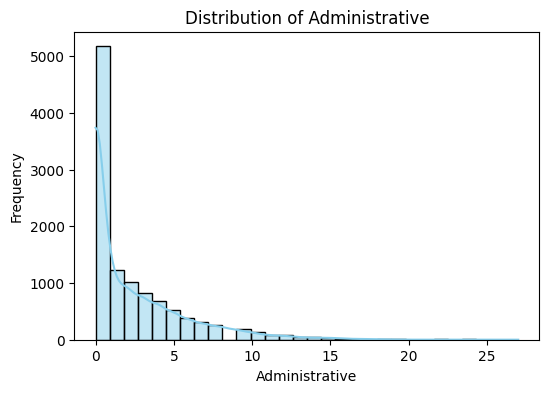

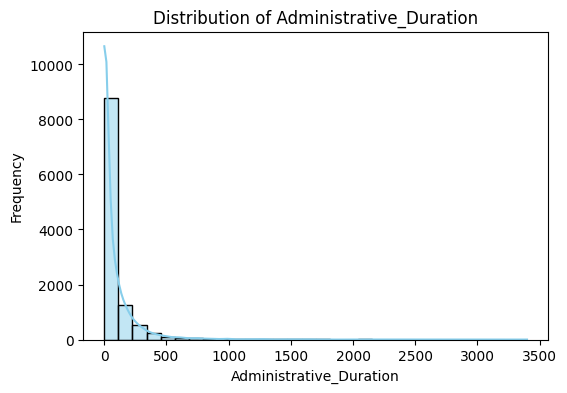

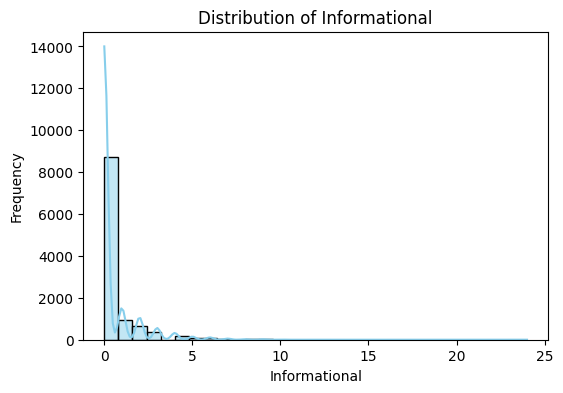

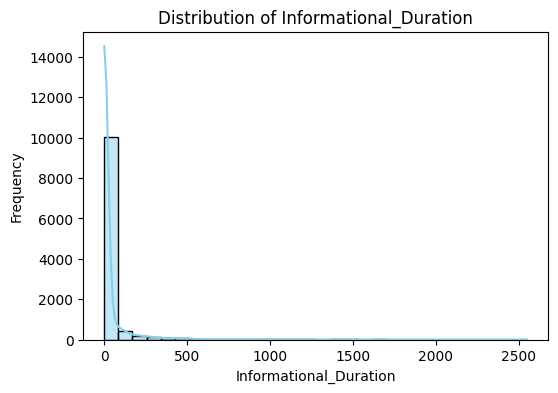

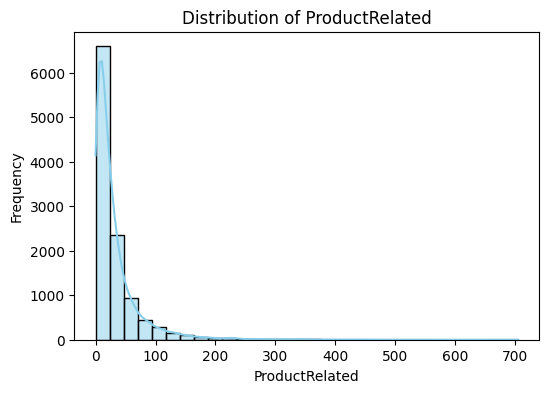

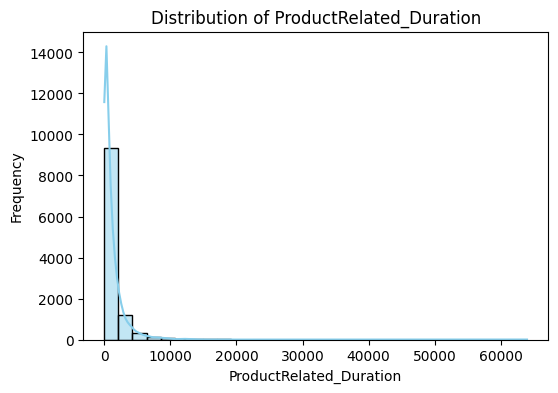

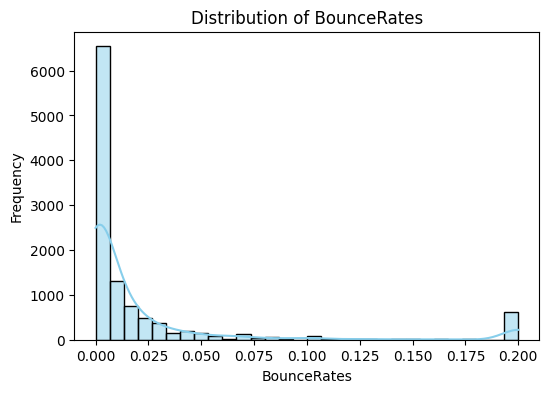

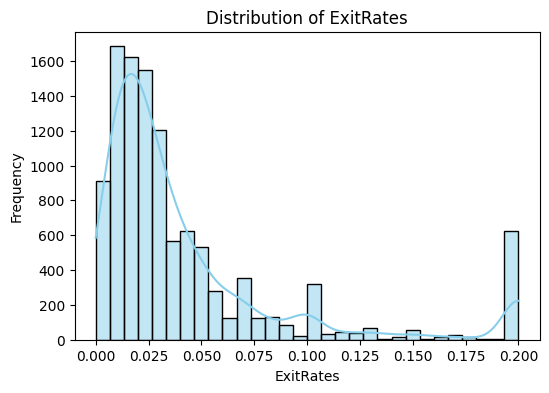

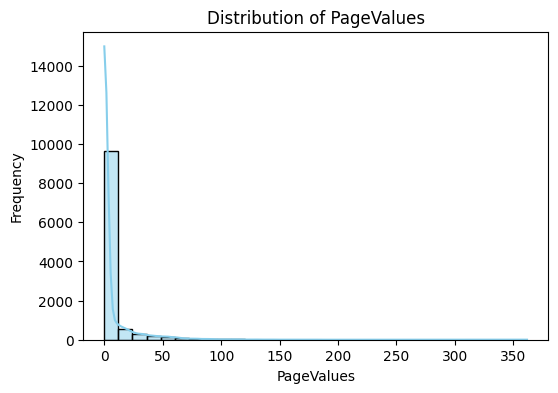

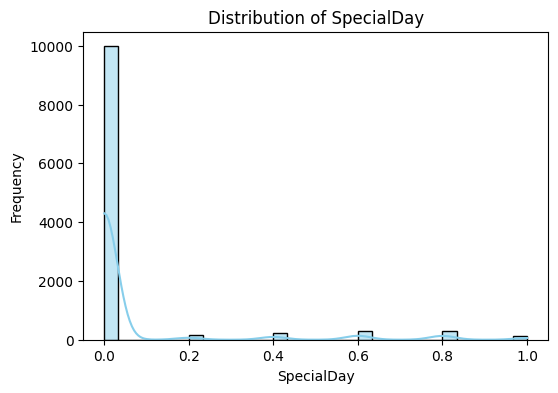

In [88]:
# plot histograms for numerical variables and count plots for categorical variables

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-89-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


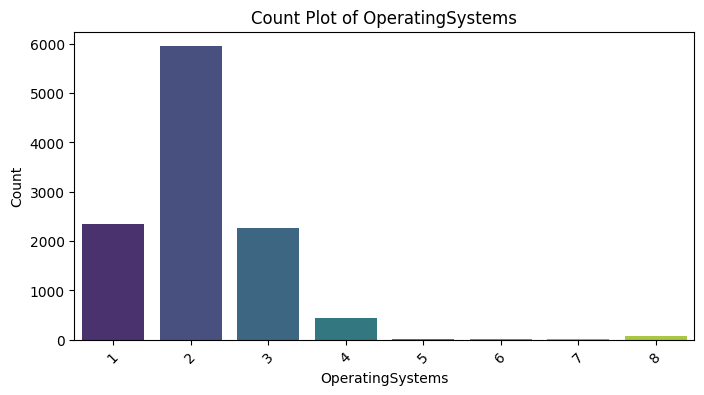

<ipython-input-89-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


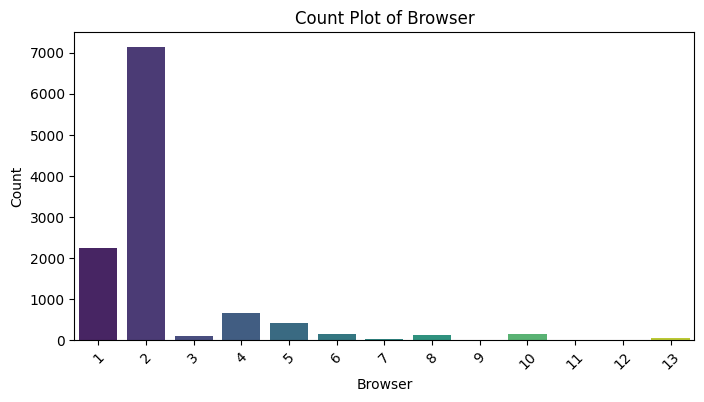

<ipython-input-89-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


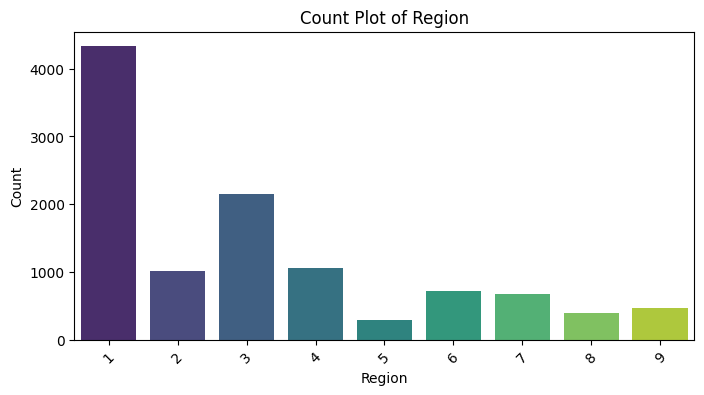

<ipython-input-89-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


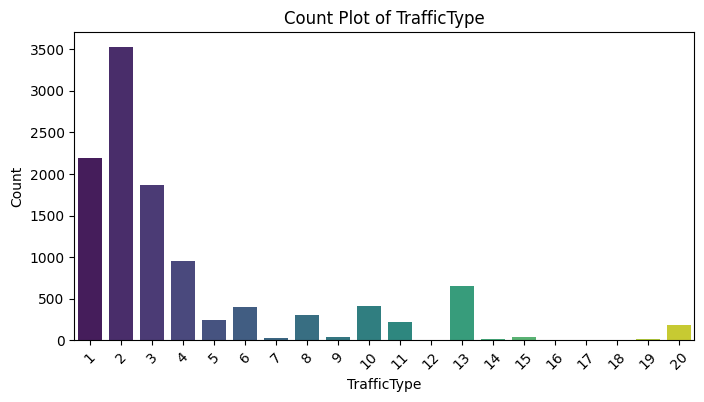

<ipython-input-89-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


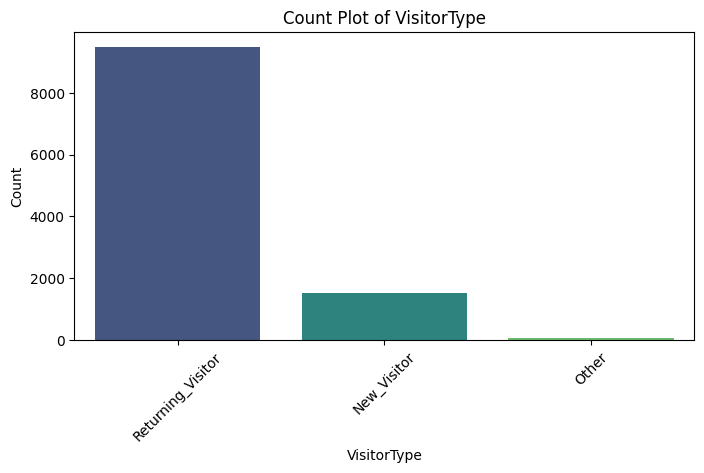

<ipython-input-89-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


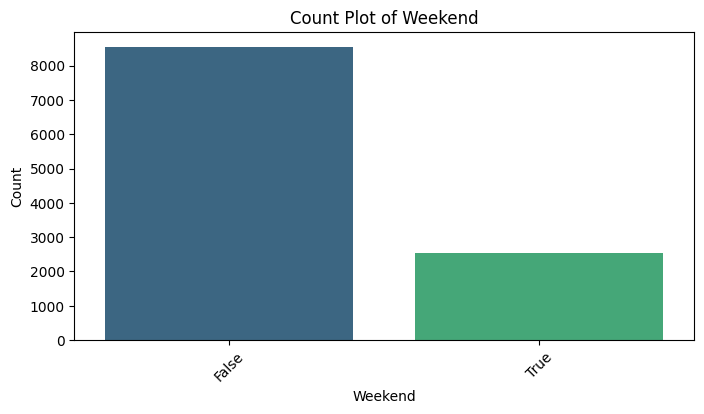

<ipython-input-89-1b693d59578e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, palette='viridis')


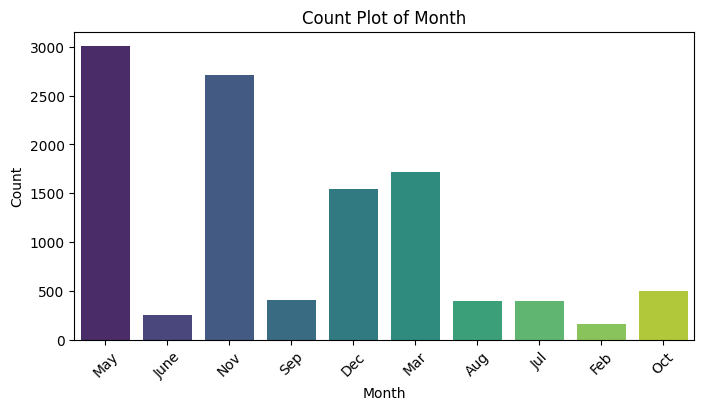

In [89]:
# Plot count plots
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Compare the distribution of features for each target class

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


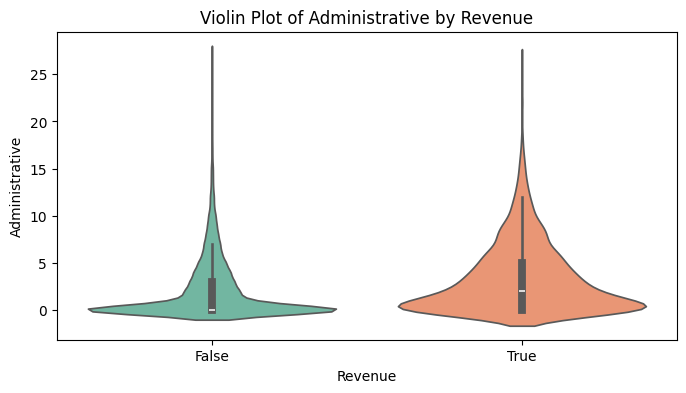

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


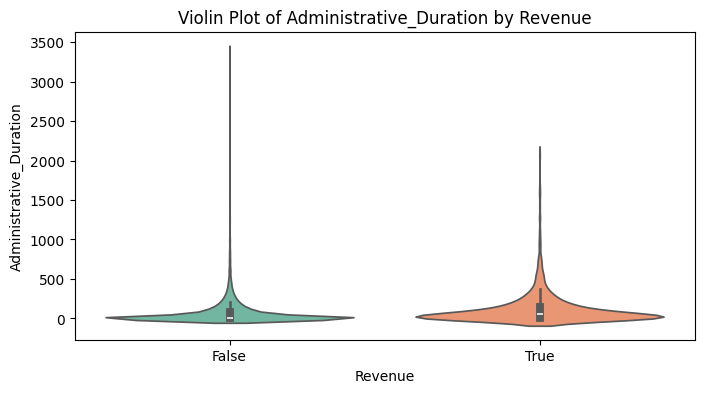

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


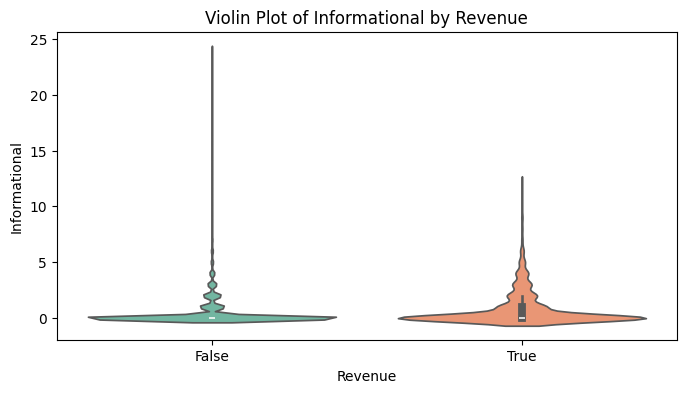

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


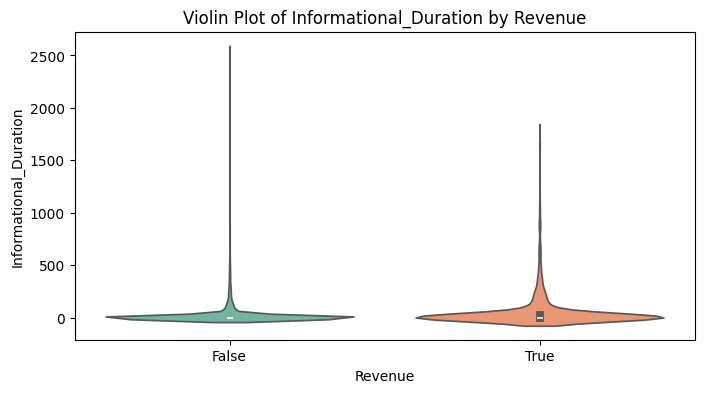

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


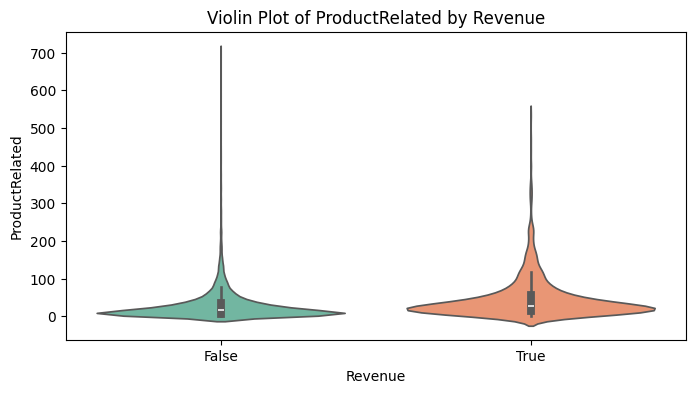

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


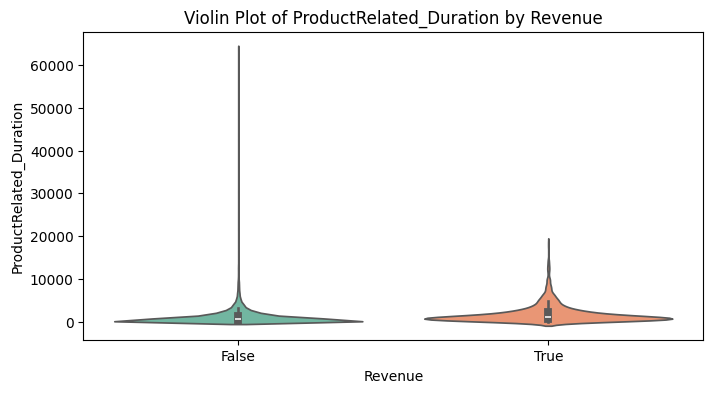

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


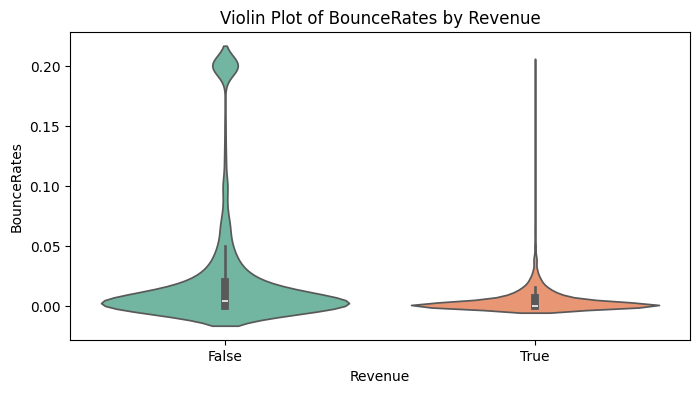

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


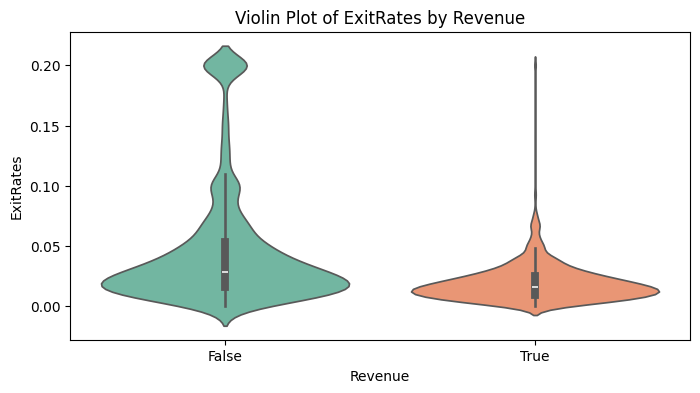

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


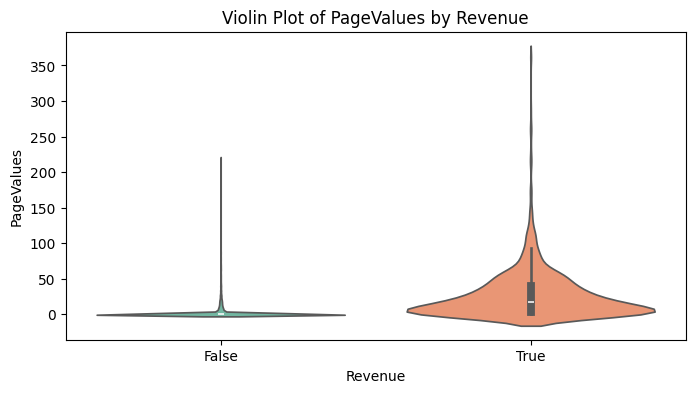

<ipython-input-90-3143bce9591e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=train_df, palette='Set2')


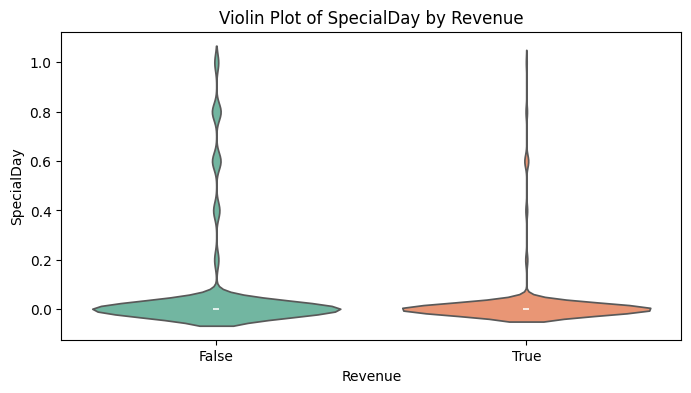

In [90]:
target = 'Revenue'
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=target, y=col, data=train_df, palette='Set2')
    plt.title(f'Violin Plot of {col} by {target}')
    plt.xlabel(target)
    plt.ylabel(col)
    plt.show()

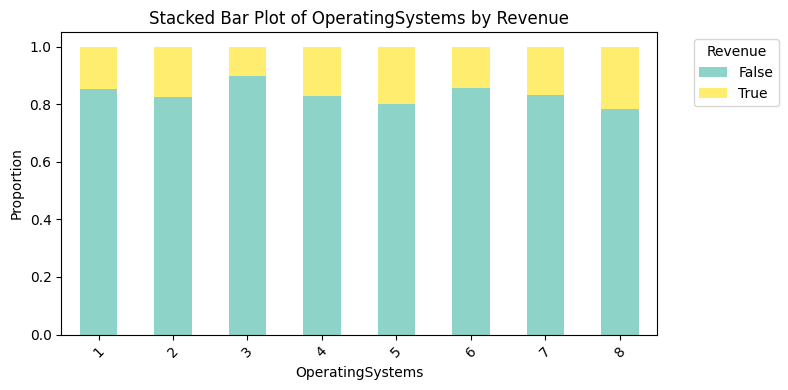

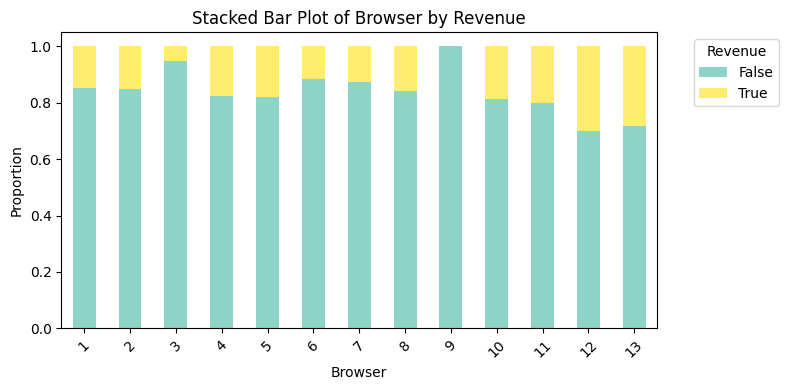

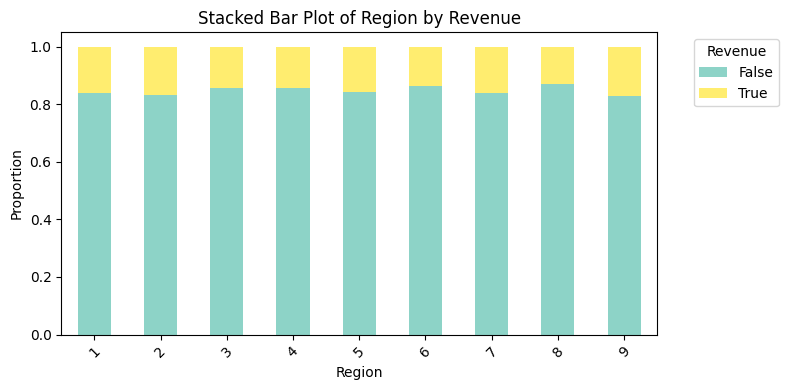

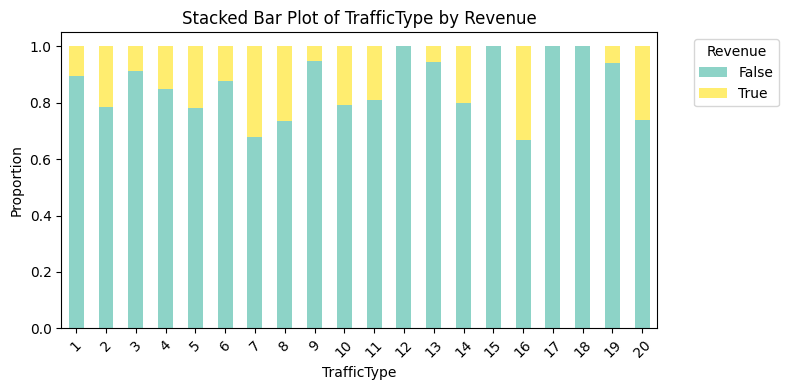

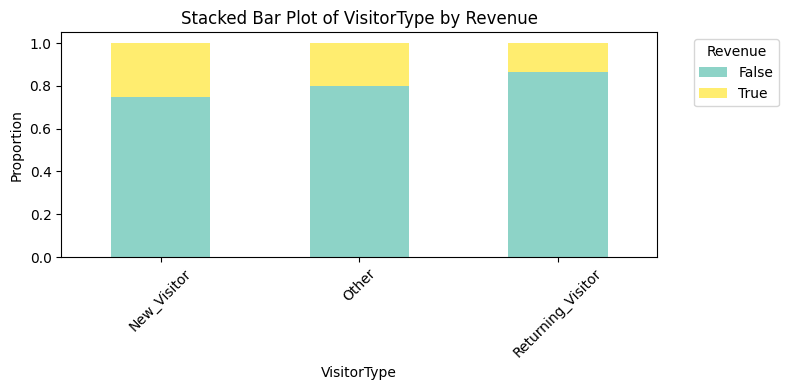

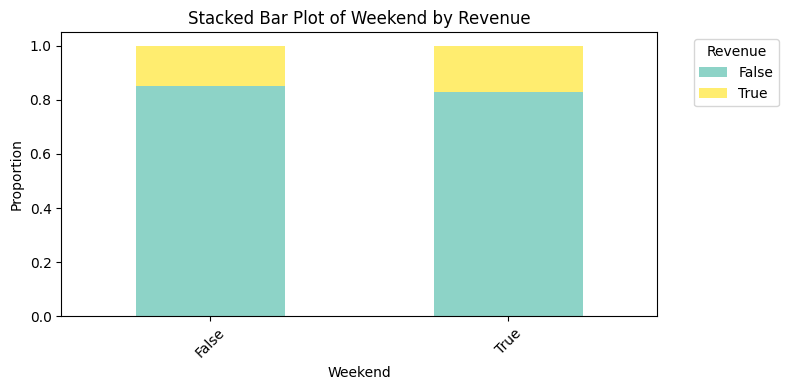

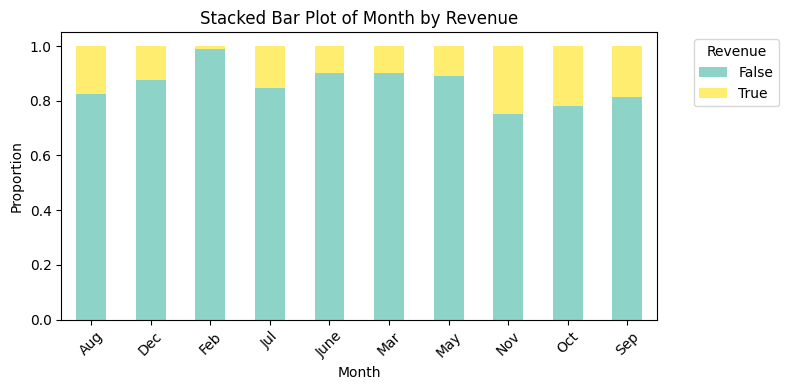

In [91]:
for col in categorical_cols:
    cross_tab = pd.crosstab(train_df[col], train_df[target], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set3')

    plt.title(f'Stacked Bar Plot of {col} by {target}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Data Preprocessing

## Box Plots


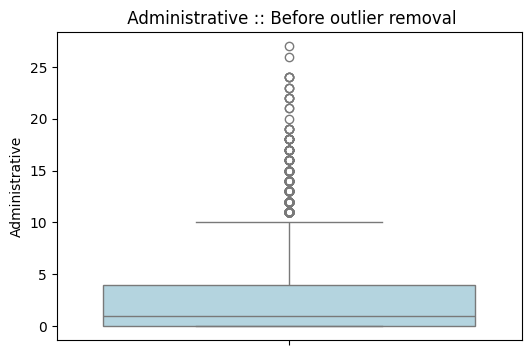

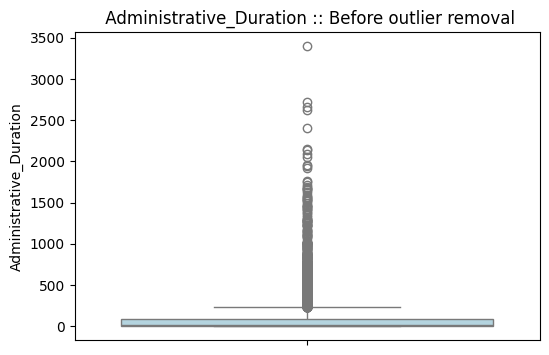

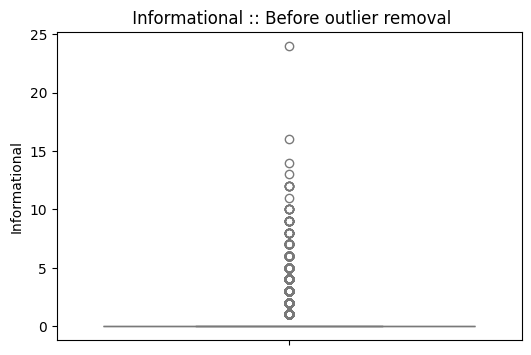

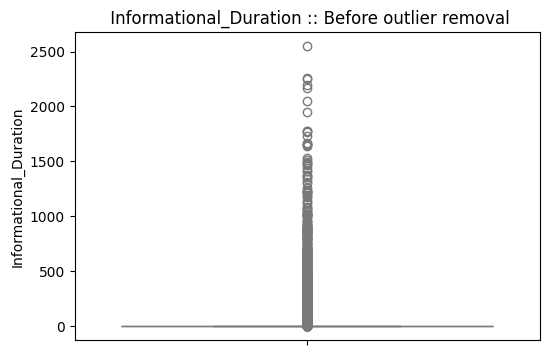

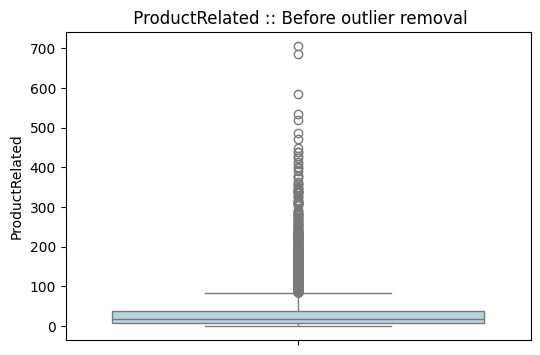

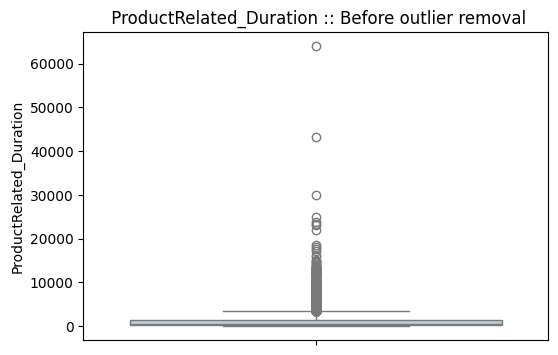

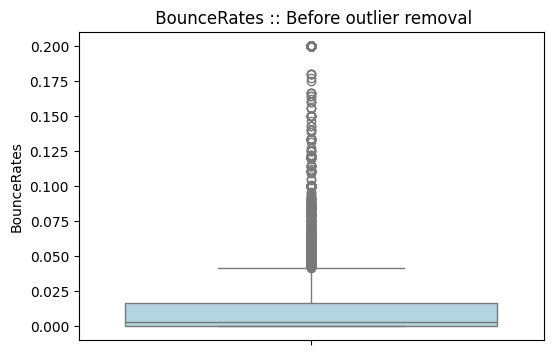

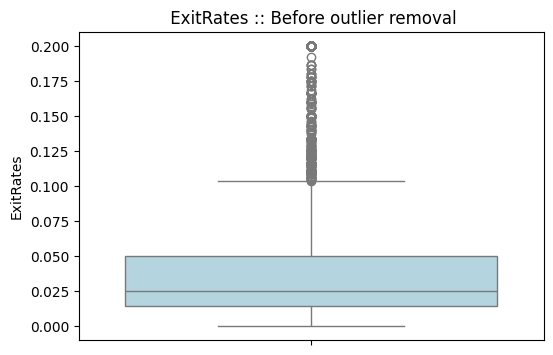

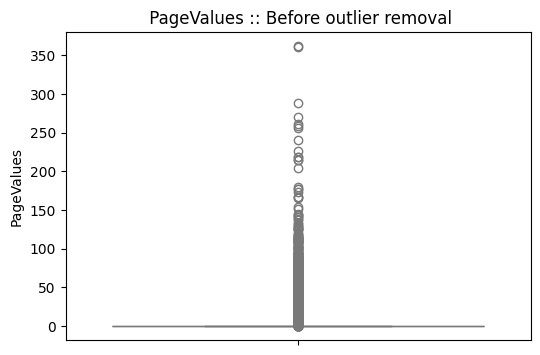

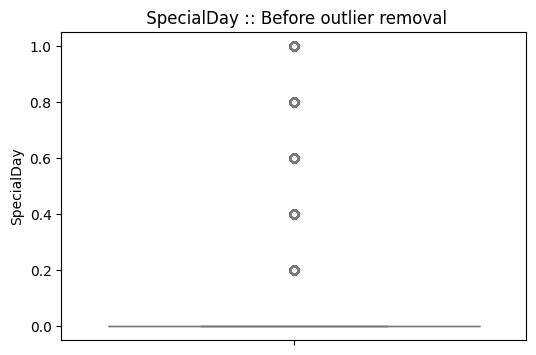

In [92]:
# Plot boxplots for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=train_df[col], color='lightblue')
    plt.title(f' {col} :: Before outlier removal')
    plt.show()

## One hot encoding


In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  float64
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  float64
 4   ProductRelated           11097 non-null  int64  
 5   ProductRelated_Duration  11097 non-null  float64
 6   BounceRates              11097 non-null  float64
 7   ExitRates                11097 non-null  float64
 8   PageValues               11097 non-null  float64
 9   SpecialDay               11097 non-null  float64
 10  Month                    11097 non-null  object 
 11  OperatingSystems         11097 non-null  int64  
 12  Browser                  11097 non-null  int64  
 13  Region                   11097 non-null  int64  
 14  TrafficType           

In [94]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 

encoded_train_data = encoder.transform(train_df[categorical_cols])
encoded_test_data = encoder.transform(test_df[categorical_cols])


encoded_train_df = pd.DataFrame(encoded_train_data, columns=encoder.get_feature_names_out(categorical_cols))
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical columns in original DataFrames
train_df = pd.concat([train_df.drop(columns=categorical_cols), encoded_train_df], axis=1)
test_df = pd.concat([test_df.drop(columns=categorical_cols), encoded_test_df], axis=1)


In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 11097 non-null  int64  
 1   Administrative_Duration        11097 non-null  float64
 2   Informational                  11097 non-null  int64  
 3   Informational_Duration         11097 non-null  float64
 4   ProductRelated                 11097 non-null  int64  
 5   ProductRelated_Duration        11097 non-null  float64
 6   BounceRates                    11097 non-null  float64
 7   ExitRates                      11097 non-null  float64
 8   PageValues                     11097 non-null  float64
 9   SpecialDay                     11097 non-null  float64
 10  Revenue                        11097 non-null  bool   
 11  OperatingSystems_1             11097 non-null  float64
 12  OperatingSystems_2             11097 non-null 

In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1233 non-null   int64  
 1   Administrative                 1233 non-null   int64  
 2   Administrative_Duration        1233 non-null   float64
 3   Informational                  1233 non-null   int64  
 4   Informational_Duration         1233 non-null   float64
 5   ProductRelated                 1233 non-null   int64  
 6   ProductRelated_Duration        1233 non-null   float64
 7   BounceRates                    1233 non-null   float64
 8   ExitRates                      1233 non-null   float64
 9   PageValues                     1233 non-null   float64
 10  SpecialDay                     1233 non-null   float64
 11  OperatingSystems_1             1233 non-null   float64
 12  OperatingSystems_2             1233 non-null   f

In [97]:
split_point = int(0.8 * len(train_df))
train_train_df = train_df[:split_point]
train_test_df = train_df[split_point:]

In [98]:
print(train_train_df.shape)
print(train_test_df.shape)

(8877, 76)
(2220, 76)


In [99]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
train_train_df[numerical_cols] = scalar.fit_transform(train_train_df[numerical_cols])
train_test_df[numerical_cols] = scalar.transform(train_test_df[numerical_cols])
test_df[numerical_cols] = scalar.transform(test_df[numerical_cols])
train_df[numerical_cols] = scalar.transform(train_df[numerical_cols])

<ipython-input-99-34f5dd85c6b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_train_df[numerical_cols] = scalar.fit_transform(train_train_df[numerical_cols])
<ipython-input-99-34f5dd85c6b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_df[numerical_cols] = scalar.transform(train_test_df[numerical_cols])


In [100]:
train_train_df['Revenue'] = train_train_df['Revenue'].astype(int)
train_test_df['Revenue'] = train_test_df['Revenue'].astype(int)

<ipython-input-100-684275fc0acd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_train_df['Revenue'] = train_train_df['Revenue'].astype(int)
<ipython-input-100-684275fc0acd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_df['Revenue'] = train_test_df['Revenue'].astype(int)


Optimized weights: [ 5.33939738e-04 -8.24147170e-03  7.16922847e-02 -8.85872060e-04
  8.82164894e-02  8.53759600e-02 -5.16575178e-02 -7.69623206e-01
  1.56856893e+00 -7.17557746e-02 -1.08659323e-01 -7.64289617e-02
 -3.48019509e-01 -1.94051960e-01  4.55573297e-03 -5.44603324e-02
  5.26747062e-02 -1.46913421e-01 -1.47559335e-01 -1.39375636e-01
 -3.20904467e-01 -8.93461605e-02  3.04297807e-02 -3.28039641e-01
 -4.89264624e-03  3.08760973e-02 -2.81832897e-03 -3.41906957e-03
  4.55573297e-03  1.86412091e-01 -8.72214861e-02 -7.30326347e-02
  1.16339102e-01 -1.12805966e-01 -1.67154264e-01 -3.29572439e-01
 -1.89591584e-02 -2.14833868e-02  7.16588823e-02 -3.36293203e-01
 -1.35091778e-01 -1.59954189e-02 -3.94843024e-01 -1.74408557e-01
  6.61243203e-02 -2.34502383e-01 -1.62465893e-02  3.54051372e-01
 -1.59938008e-01  2.76334189e-01  2.46286684e-01 -3.01469409e-03
 -6.05698441e-01 -4.46876302e-02 -1.47036786e-01  6.65976513e-02
 -1.79805150e-03 -4.19757328e-02 -7.52726171e-02  1.69812426e-01
 -1.98

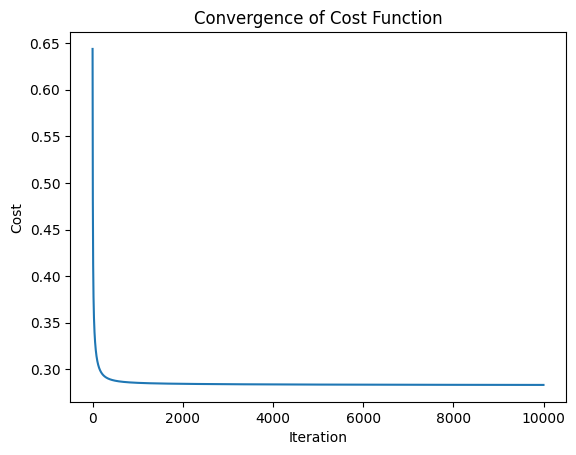

Accuracy: 0.8919
Precision: 0.7790
Recall: 0.4135
F1 Score: 0.5402
Confusion Matrix:
 [[1839   40]
 [ 200  141]]


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Vectorized Cost Function with numerical stability
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    epsilon = 1e-15  # Small constant to prevent log(0)
    cost = -np.mean(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Vectorized Gradient Computation
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    error = h - y
    dj_dw = np.dot(X.T, error) / m
    dj_db = np.sum(error) / m
    return dj_db, dj_dw

# Gradient Descent
def gradient_descent(X, y, w, b, alpha, num_iters):
    J_history = []
    for _ in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_history.append(compute_cost(X, y, w, b))  # Store cost after updating parameters
    return w, b, J_history

# Prediction Function
def predict(X, w, b, threshold=0.5):
    return (sigmoid(np.dot(X, w) + b) >= threshold).astype(int)


y_train = train_df['Revenue'].values  
X_train = train_df.drop(columns=['Revenue']).values

# Initialize weights and bias
w_init = np.zeros(X_train.shape[1])
b_init = 0

# Train the model
weights, bias, cost_history = gradient_descent(X_train, y_train, w_init, b_init, alpha=0.1, num_iters=10000)

# Print final weights and bias
print("Optimized weights:", weights)
print("Optimized bias:", bias)

# Plot cost function convergence
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Convergence of Cost Function")
plt.show()

# Test Set Evaluation
X_test = train_test_df.drop(columns=['Revenue']).values
y_test = train_test_df['Revenue'].values
y_pred = predict(X_test, weights, bias)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


In [102]:
# def predict(X, w, b):
#     return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)


# # Prepare test data
# y_test = train_test_df['Revenue'].values
# # print(np.unique(y_test))
# X_test = train_test_df.drop(columns=['Revenue']).values

# # Predictions
# y_pred = predict(X_test, weights, bias)

# # Evaluation Metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# # Report performance
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

In [103]:
X_train = train_train_df.drop(columns=['Revenue'])
y_train = train_train_df['Revenue']
X_test = train_test_df.drop(columns=['Revenue'])
y_test = train_test_df['Revenue']

Logistic Regression Results:
Accuracy: 0.8405
Precision: 0.4880
Recall: 0.7742
F1 Score: 0.5986
--------------------------------------------------


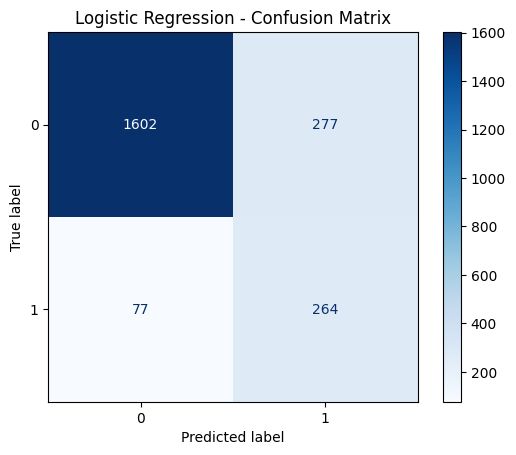

SVC Results:
Accuracy: 0.8698
Precision: 0.5565
Recall: 0.7507
F1 Score: 0.6392
--------------------------------------------------


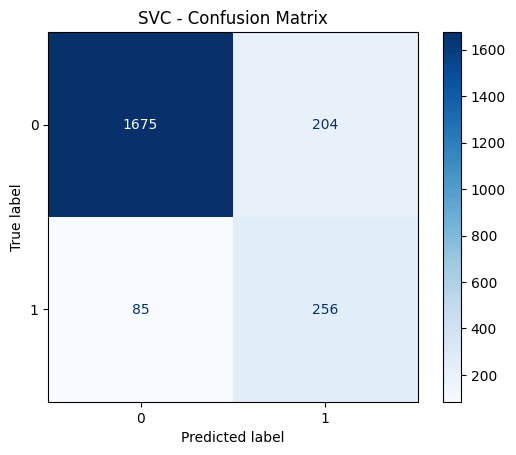

Decision Tree Classifier Results:
Accuracy: 0.8550
Precision: 0.5255
Recall: 0.5748
F1 Score: 0.5490
--------------------------------------------------


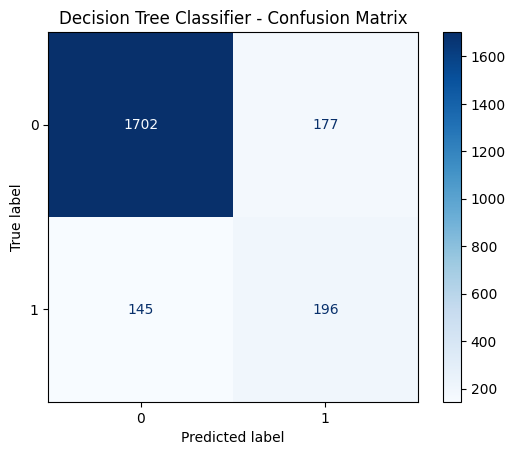

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train and evaluate Logistic Regression
# log_reg = LogisticRegression(max_iter=10000, class_weight='balanced')
log_reg = LogisticRegression(max_iter=10000, penalty=None, class_weight='balanced')
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

# Train and evaluate SVC
svc = SVC(class_weight='balanced')
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)

# Train and evaluate Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predictions = dtc.predict(X_test)

# Function to evaluate models
def evaluate_model(y_true, predictions, model_name):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions, zero_division=0)
    recall = recall_score(y_true, predictions, zero_division=0)
    f1 = f1_score(y_true, predictions, zero_division=0)

    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print('-' * 50)

# Function to display confusion matrix
def display_confusion_matrix(y_true, predictions, model_name):
    cm = confusion_matrix(y_true, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

# Evaluate and display results for Logistic Regression
evaluate_model(y_test, log_reg_predictions, "Logistic Regression")
display_confusion_matrix(y_test, log_reg_predictions, "Logistic Regression")

# Evaluate and display results for SVC
evaluate_model(y_test, svc_predictions, "SVC")
display_confusion_matrix(y_test, svc_predictions, "SVC")

# Evaluate and display results for Decision Tree Classifier
evaluate_model(y_test, dtc_predictions, "Decision Tree Classifier")
display_confusion_matrix(y_test, dtc_predictions, "Decision Tree Classifier")


In [105]:
test_df_t = test_df.drop(columns=['id'])

In [106]:
y_out = predict(test_df_t.values, weights,bias)

In [107]:
y_out1 = log_reg.predict(test_df_t)
y_out2 = svc.predict(test_df_t)
y_out3 = dtc.predict(test_df_t)

In [108]:
print(np.sum(y_out))
print(np.sum(y_out1))
print(np.sum(y_out2))
print(np.sum(y_out3))

93
294
273
197


In [109]:
# Load Kaggle test dataset and keep only the 'id' column
kaggle_output_df = pd.read_csv("/content/kaggle_test.csv")
kaggle_output_df = kaggle_output_df[['id']]

# Create output DataFrame with 'id' and 'Revenue'
output_col = pd.DataFrame({'id': test_df['id'], 'Revenue': y_out3})

# Merge on 'id' to avoid duplicate columns
kaggle_output_df = pd.merge(kaggle_output_df, output_col, on='id', how='left')

# Display the first 15 rows to verify
print(kaggle_output_df.head(15))

# Save the DataFrame as a CSV file
kaggle_output_df.to_csv('kaggle_val.csv', index=False)


    id  Revenue
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        0
8    8        0
9    9        0
10  10        0
11  11        0
12  12        0
13  13        0
14  14        0
